In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

<function matplotlib.pyplot.show(close=None, block=None)>

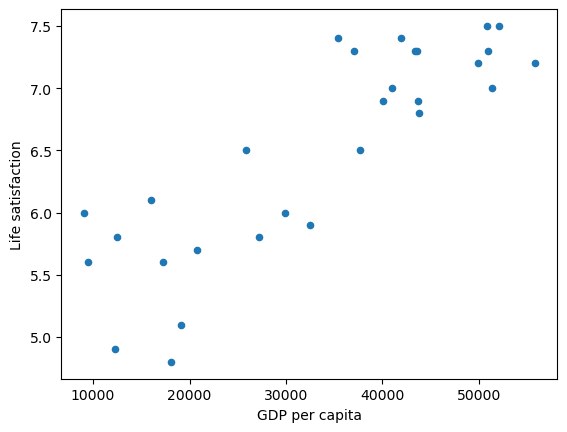

In [2]:
oecd_bli = pd.read_csv('oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
Y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")

plt.show

In [8]:
# Linear regression
lin_model = sklearn.linear_model.LinearRegression()

# k-neighbors 

k_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [9]:
lin_model.fit(X, Y)

LinearRegression()

In [10]:
k_model.fit(X, Y)

KNeighborsRegressor(n_neighbors=3)

In [13]:
X_new = [[22500]]
print(lin_model.predict(X_new))
print(k_model.predict(X_new))

[[5.95815033]]
[[5.76666667]]
